In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math 
#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
evt_number = 330
#file_number = quitar ultimo digito + 1
file_number = 34
blobR = 21
testID = ''
filetype = '0nubb'

In [3]:
filepath = f'/Users/halmamol/NEXT/files/NEXT100/beershebaFS/{filetype}/hits/'
filename = f'next100.{filetype}.{file_number}.deconv.h5'
h5file = filepath+filename

In [4]:
hits = pd.read_hdf(h5file, 'MC/hits')
hits

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,330,2,0,-94.950500,-76.450203,156.231155,0.003703,0.028503,ACTIVE
1,330,2,1,-94.493996,-75.620567,156.499496,0.007381,0.007704,ACTIVE
2,330,2,2,-94.260208,-74.729736,156.852509,0.011073,0.006059,ACTIVE
3,330,2,3,-93.981567,-73.998528,157.455826,0.014777,0.005621,ACTIVE
4,330,2,4,-93.990150,-73.614082,158.376785,0.018523,0.003978,ACTIVE
...,...,...,...,...,...,...,...,...,...
5874,339,1,169,-364.082031,-108.051361,748.184937,0.374729,0.000062,ACTIVE
5875,339,1,170,-364.081421,-108.051788,748.182556,0.374834,0.001353,ACTIVE
5876,339,1,171,-364.080353,-108.052078,748.182190,0.374866,0.000428,ACTIVE
5877,339,1,172,-364.079437,-108.052162,748.181824,0.374894,0.000058,ACTIVE


In [5]:
evt_hits = hits[hits.event_id == evt_number]
evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

xt = evt_hits.x
yt = evt_hits.y
zt = evt_hits.z
et = evt_hits.energy*1000

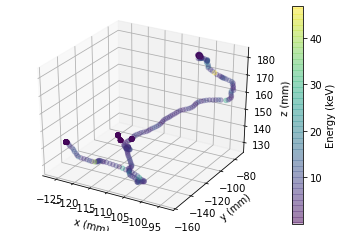

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(xt, yt, zt, c=et, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()

In [7]:
particles = pd.read_hdf(h5file, 'MC/particles')
evt_part = particles[particles.event_id == evt_number]

primaries = evt_part[evt_part.primary == True]
#if len(primaries) != 2:
#    exit()

In [8]:
primaries

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,330,2,e-,True,0,-95.496521,-77.283905,156.264725,0.0,-101.437897,...,0.451195,0.940645,0.036805,-0.0,-0.0,0.0,0.651268,50.005486,none,Scintillation
96,330,1,e-,True,0,-95.496521,-77.283905,156.264725,0.0,-126.680588,...,-1.535743,-1.638206,0.260283,-0.0,-0.0,-0.0,1.806563,146.059769,none,Scintillation


In [9]:
if filetype == '0nubb':
    part1 = primaries[primaries.particle_id == 1]
    part2 = primaries[primaries.particle_id == 2]
    x_e1 = part1.final_x.values[0]
    y_e1 = part1.final_y.values[0]
    z_e1 = part1.final_z.values[0]
    x_e2 = part2.final_x.values[0]
    y_e2 = part2.final_y.values[0]
    z_e2 = part2.final_z.values[0]

    bx = np.array([x_e1, x_e2])
    by = np.array([y_e1, y_e2])
    bz = np.array([z_e1, z_e2])
    bx
elif filetype == 'e-_roi':
    part1 = primaries[primaries.particle_id == 1]
    x_e1 = part1.final_x.values[0]
    y_e1 = part1.final_y.values[0]
    z_e1 = part1.final_z.values[0]

    bx = np.array([x_e1])
    by = np.array([y_e1])
    bz = np.array([z_e1])

In [10]:
#Computing true energy of the blobs

#blob 1
b1_true = 0.0
for i in range(1,len(xt)):
    bx[0]
    R = np.sqrt((bx[0]-xt.values[i])**2+(by[0]-yt.values[i])**2+(bz[0]-zt.values[i])**2)
    if R<blobR:
        b1_true = b1_true + et.values[i]
b1_true = b1_true/1000
print(f'Blob 1 energy = {b1_true}')

Blob 1 energy = 0.332409068915993


In [11]:
filepath = f'/Users/halmamol/NEXT/files/NEXT100/beershebaDS_202012/{filetype}/hits/'
#filename = f'esmeralda.0nubb.1.deconv{testID}.h5'
filename = f'next100.{filetype}.{file_number}.deconv{testID}.h5'
h5file = filepath+filename

In [12]:
h5 = tb.open_file(h5file)
h5

File(filename=/Users/halmamol/NEXT/files/NEXT100/beershebaDS_202012/0nubb/hits/next100.0nubb.34.deconv.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(52680,), shuffle, zlib(4)) 'Deconvolved hits'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "npeak": UInt16Col(shape=(), dflt=0, pos=1),
  "X": Float64Col(shape=(), dflt=0.0, pos=2),
  "Y": Float64Col(shape=(), dflt=0.0, pos=3),
  "Z": Float64Col(shape=(), dflt=0.0, pos=4),
  "E": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1724,)
/Run (Group) ''
/Run/events (Table(2,), shuffle, zlib(4)) 'event info table'
  description := {
  "evt_number": Int32Col(shape=(), dflt=0, pos=0),
  "timestamp": UInt64Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (5461,)
/Run/runInfo (Table(2,), shuffle, zlib(4)) 

In [13]:
hits_df = pd.read_hdf(h5file, 'DECO/Events')
hits_df

,event,npeak,X,Y,Z,E
0,330,0,-119.5,-140.5,128.382281,1.909528e-05
1,330,0,-119.5,-139.5,128.382281,2.000219e-05
2,330,0,-119.5,-138.5,128.382281,2.058658e-05
3,330,0,-119.5,-137.5,128.382281,2.085156e-05
4,330,0,-119.5,-136.5,128.382281,2.082454e-05
...,...,...,...,...,...,...
52675,331,1,-30.5,-80.5,1003.798125,6.204938e-07
52676,331,1,-30.5,-79.5,1003.798125,6.245058e-07
52677,331,1,-30.5,-78.5,1003.798125,5.704090e-07
52678,331,1,-30.5,-77.5,1003.798125,4.718630e-07


In [14]:
#These lines, and the two below (uncommented) are equivalent:

#with tb.open_file(h5file) as h5in:
#    table = getattr(getattr(h5in.root, 'DECO'), 'Events').read()
#    hits_df = pd.DataFrame.from_records(table)
#    this_evt_df = hits_df[hits_df.event == evt_number]
#    the_hits = []

this_evt_df = hits_df[hits_df.event == evt_number]

    
x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

print(x)
x_range = (x.max()-x.min())/2.
y_range = (y.max()-y.min())/2.
z_range = (z.max()-z.min())/2.
mid_x   = (x.max()+x.min())/2.
mid_y   = (y.max()+y.min())/2.
mid_z   = (z.max()+z.min())/2.

xbins = int(x.max()-x.min())
ybins = int(y.max()-y.min())
zbins = int((z.max()-z.min())/2.)

0       -119.5
1       -119.5
2       -119.5
3       -119.5
4       -119.5
         ...  
25419    -93.5
25420    -92.5
25421    -92.5
25422    -92.5
25423    -92.5
Name: X, Length: 25424, dtype: float64


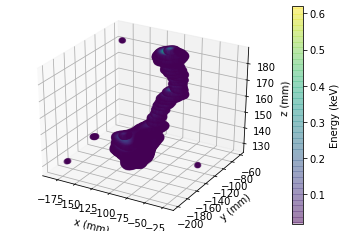

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()

In [16]:
filepath = f'/Users/halmamol/NEXT/files/NEXT100/beershebaDS_202012/{filetype}/tracks/21mm/'
filename = f'next100.{filetype}.{file_number}.skel_tracks.R21mm{testID}.h5'
h5file = filepath+filename

In [17]:
tracks_df = pd.read_hdf(h5file, 'Tracks')
tracks_df.columns

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'x_max',
       'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'extreme1_x',
       'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z',
       'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z',
       'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x', 'vox_size_y',
       'vox_size_z'],
      dtype='object')

In [18]:
this_evt_tracks_df = tracks_df[tracks_df.event == evt_number]

blob1_x = float(this_evt_tracks_df.blob1_x.values[0])
blob1_y = float(this_evt_tracks_df.blob1_y.values[0])
blob1_z = float(this_evt_tracks_df.blob1_z.values[0])
blob2_x = float(this_evt_tracks_df.blob2_x.values[0])
blob2_y = float(this_evt_tracks_df.blob2_y.values[0])
blob2_z = float(this_evt_tracks_df.blob2_z.values[0])

blob1_e = float(this_evt_tracks_df.eblob1.values[0])
blob2_e = float(this_evt_tracks_df.eblob2.values[0])

print(f'Number of tracks = {tracks_df.numb_of_tracks.values[0]}')

Number of tracks = 5


In [19]:
rbx = np.array([blob1_x, blob2_x], dtype=np.float)
rby = np.array([blob1_y, blob2_y], dtype=np.float)
rbz = np.array([blob1_z, blob2_z], dtype=np.float)
rby

array([ -74.77236842, -162.87763158])

In [20]:
if filetype == '0nubb':
    print('TRUE')
    print(f'BLOB1 (x,y,z)=({x_e1},{y_e1},{z_e1})')
    print(f'BLOB2 (x,y,z)=({x_e2},{y_e2},{z_e2})')
elif filetype == 'e-_roi':
    print('TRUE')
    print(f'BLOB1 (x,y,z)=({x_e1},{y_e1},{z_e1})')
print('RECO')
print(f'BLOB1 e={blob1_e}MeV')
print(f'BLOB1 (x,y,z)=({blob1_x},{blob1_y},{blob1_z})')
print(f'BLOB2 e={blob2_e}MeV')
print(f'BLOB2 (x,y,z)=({blob2_x},{blob2_y},{blob2_z})')

if filetype == '0nubb':
    print('RECO-TRUE')
    print(f'BLOB1 (Dx,Dy,Dz)=({blob1_x-x_e2},{blob1_y-y_e2},{blob1_z-z_e2})')
    print(f'BLOB1 (Dx,Dy,Dz)=({blob2_x-x_e1},{blob2_y-y_e1},{blob2_z-z_e1})')

TRUE
BLOB1 (x,y,z)=(-126.68058776855469,-143.61846923828125,138.8186798095703)
BLOB2 (x,y,z)=(-101.43789672851562,-83.30461883544922,180.87680053710938)
RECO
BLOB1 e=0.3599694378065291MeV
BLOB1 (x,y,z)=(-115.24687500000046,-74.77236842104978,179.48672812500268)
BLOB2 e=0.2325073685910042MeV
BLOB2 (x,y,z)=(-95.3718749999997,-162.87763157895023,139.50350312499788)
RECO-TRUE
BLOB1 (Dx,Dy,Dz)=(-13.808978271484833,8.532250414399442,-1.39007241210669)
BLOB1 (Dx,Dy,Dz)=(31.308712768554983,-19.25916234066898,0.6848233154275647)


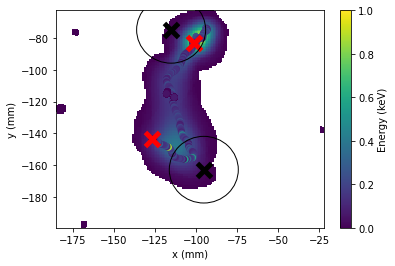

In [21]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.hist2d(x, y, weights=e, bins=(xbins, ybins),
               range=((mid_x - x_range, mid_x + x_range), (mid_y - y_range, mid_y + y_range)),
               cmin=0.0001)
plt.scatter(xt, yt, cmap='viridis', c=et)
plt.scatter(bx, by, marker='x', s=200, linewidth=5, color='red')
plt.scatter(rbx, rby,marker='x', s=200, linewidth=5, color='black')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

circle1 = plt.Circle((blob1_x, blob1_y), 21, edgecolor = 'black', fill = False ,linestyle = '-')
circle2 = plt.Circle((blob2_x, blob2_y), 21, edgecolor = 'black', fill = False ,linestyle = '-')
ax.add_artist(circle1)
ax.add_artist(circle2)
cb = plt.colorbar(label='Energy (keV)')
plt.show()

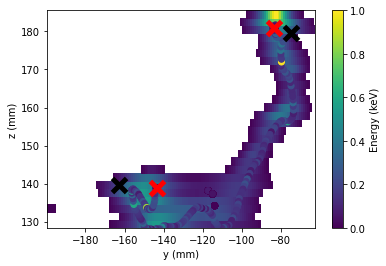

In [22]:
plt.hist2d(y, z, weights=e, bins=(ybins, zbins),
               range=((mid_y - y_range, mid_y + y_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)
plt.scatter(yt, zt, cmap='viridis', c=et)
plt.scatter(by, bz, marker='x', s=200, linewidth=5, color='red')
plt.scatter(rby, rbz, marker='x', s=200, linewidth=5, color='black')
plt.xlabel('y (mm)')
plt.ylabel('z (mm)')

circle1 = plt.Circle((blob1_y, blob1_z), 21, edgecolor = 'black', fill = False ,linestyle = '-')
circle2 = plt.Circle((blob2_y, blob2_z), 21, edgecolor = 'black', fill = False ,linestyle = '-')
ax.add_artist(circle1)
ax.add_artist(circle2)
cb = plt.colorbar(label='Energy (keV)')

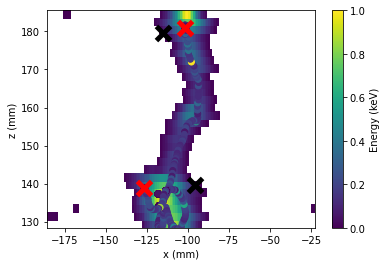

In [23]:
plt.hist2d(x, z, weights=e, bins=(xbins, zbins),
               range=((mid_x - x_range, mid_x + x_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)
plt.scatter(xt, zt, cmap='viridis', c=et)
plt.scatter(bx, bz, marker='x', s=200, linewidth=5, color='red')
plt.scatter(rbx, rbz, marker='x', s=200, linewidth=5, color='black')
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
cb = plt.colorbar(label='Energy (keV)')

radius = 21
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:40j]
x_1 = x_e1+np.cos(u)*np.sin(v)*radius
y_1 = y_e1+np.sin(u)*np.sin(v)*radius
z_1 = z_e1+np.cos(v)*radius
ax.plot_wireframe(x_1, y_1, z_1, color="red", alpha=0.1)

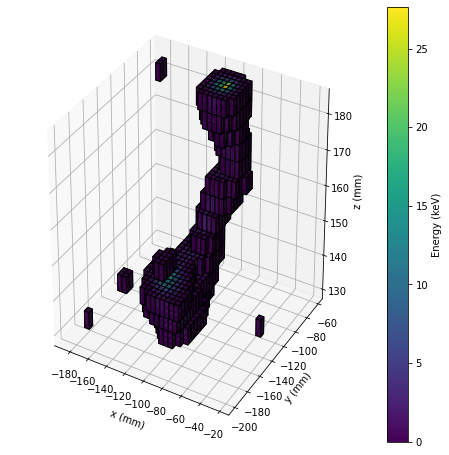

In [24]:
base_vsize = 5 #mm
the_hits = []

xs = this_evt_df.X
ys = this_evt_df.Y
zs = this_evt_df.Z
es = this_evt_df.E

for x, y, z, e in zip(xs, ys, zs, es):
    if np.isnan(e): continue
    h = Hit(0, Cluster(0, xy(x,y), xy(0,0), 0), z, e*1000, xy(0,0))
    the_hits.append(h)

voxels = voxelize_hits(the_hits,
                       np.array([base_vsize, base_vsize, base_vsize]), False)

vsizex = voxels[0].size[0]
vsizey = voxels[0].size[1]
vsizez = voxels[0].size[2]

min_corner_x = min(v.X for v in voxels) - vsizex/2.
min_corner_y = min(v.Y for v in voxels) - vsizey/2.
min_corner_z = min(v.Z for v in voxels) - vsizez/2.

x = [np.round(v.X/vsizex) for v in voxels]
y = [np.round(v.Y/vsizey) for v in voxels]
z = [np.round(v.Z/vsizez) for v in voxels]
e = [v.E for v in voxels]

x_min = int(min(x))
y_min = int(min(y))
z_min = int(min(z))

x_max = int(max(x))
y_max = int(max(y))
z_max = int(max(z))

#print(f'X min = {x_min}, X max = {x_max}')
#print(f'Y min = {y_min}, Y max = {y_max}')
#print(f'Z min = {z_min}, Z max = {z_max}')

VOXELS = np.zeros((x_max-x_min+1, y_max-y_min+1, z_max-z_min+1))
#print(VOXELS.shape)

# sort through the event set the "turn on" the hit voxels
cmap = cm.viridis
norm = Normalize(vmin=0, vmax=max(e))

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(z)):
    VOXELS[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = 1
    colors[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = cmap(norm(e[q]))

# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_max-x_min+2, y_max-y_min+2, z_max-z_min+2))
a = a*vsizex + min_corner_x
b = b*vsizey + min_corner_y
c = c*vsizez + min_corner_z

# a, b, c are the corners of the voxels
ax.voxels(a,b,c, VOXELS, facecolors=colors , edgecolor='k',alpha=0.8)

ax.set_xlabel('x (mm)')#,fontsize=16)
ax.set_ylabel('y (mm)')#,fontsize=16)
ax.set_zlabel('z (mm)')#,fontsize=16)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = fig.colorbar(sm)
cb.set_label('Energy (keV)')

plt.show()